# Importing Libraries


In [385]:
#importing pandas for converting dataset into dataframe
import pandas as pd
#importing numpy for linear algebra
import numpy as np
#importing seaborn for visualization of charts
import seaborn as sns 

#importing matplot libraries for constructing graphs
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import random

#importing preprocessing for vectorization of instances
from sklearn import preprocessing

#importing different ML Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#importing ML evaluation metrics
from sklearn import metrics, model_selection
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, LeavePOut

#importing scikitplot to plot confusion matrix
import scikitplot as skplt

# Reading csv into dataframe


In [296]:
genders_df = pd.read_csv("/Users/macbookpro/Desktop/gender-prediction.csv")

In [297]:
genders_df.head(10)

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,71,176,yes,short,44,no,black,male
1,68,165,no,bald,41,no,black,male
2,62,132,no,medium,37,yes,blue,female
3,65,138,no,long,38,no,gray,female
4,70,197,yes,medium,43,no,gray,male
5,71,190,yes,short,43,no,black,male
6,74,201,yes,bald,44,no,brown,male
7,74,182,no,short,46,no,brown,male
8,63,127,no,short,35,no,green,female
9,65,139,no,medium,37,yes,gray,female


In [298]:
genders_df.describe()

,height,weight,shoe_size
count,80.000000,80.000000,80.000000
mean,67.587500,144.787500,40.375000
std,3.883408,33.025764,2.616283
min,58.000000,88.000000,35.000000
25%,65.000000,121.000000,38.000000
50%,68.000000,144.000000,40.000000
75%,71.000000,167.000000,43.000000
max,74.000000,218.000000,46.000000


In [299]:
genders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   height       80 non-null     int64 
 1   weight       80 non-null     int64 
 2   beard        80 non-null     object
 3   hair_length  80 non-null     object
 4   shoe_size    80 non-null     int64 
 5   scarf        80 non-null     object
 6   eye_color    80 non-null     object
 7   gender       80 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.1+ KB


# Converting object type into numeric data


In [300]:
labels = preprocessing.LabelEncoder()
genders_df['beard'] = labels.fit_transform(genders_df['beard'])
genders_df['hair_length'] = labels.fit_transform(genders_df['hair_length'])
genders_df['scarf'] = labels.fit_transform(genders_df['scarf'])
genders_df['eye_color'] = labels.fit_transform(genders_df['eye_color'])
genders_df['gender'] = labels.fit_transform(genders_df['gender'])

In [301]:
genders_df.head(10)

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,71,176,1,3,44,0,0,1
1,68,165,0,0,41,0,0,1
2,62,132,0,2,37,1,1,0
3,65,138,0,1,38,0,3,0
4,70,197,1,2,43,0,3,1
5,71,190,1,3,43,0,0,1
6,74,201,1,0,44,0,2,1
7,74,182,0,3,46,0,2,1
8,63,127,0,3,35,0,4,0
9,65,139,0,2,37,1,3,0


# Visualizing Ratio of Classes

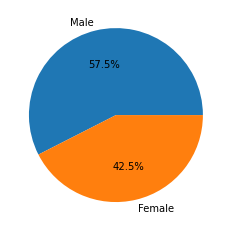

In [302]:
gender = ['Male', 'Female']
female = len(genders_df[genders_df['gender']== 0])
male = len(genders_df[genders_df['gender']== 1])
count = [male, female]
plt.pie(count, labels = gender, autopct='%1.1f%%')
plt.show()

In [303]:
size = len(genders_df)
print('Ratio of males: ', male,'/',size)
print('Ratio of females: ', female,'/',size)

Ratio of males:  46 / 80
Ratio of females:  34 / 80


<AxesSubplot:xlabel='gender', ylabel='count'>

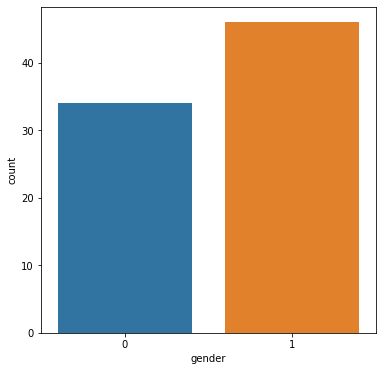

In [304]:
fig = plt.figure(figsize=(6, 6))
sns.countplot(x='gender', data= genders_df)

# Train-Test Splitting

In [305]:
genders_df.columns.values

array(['height', 'weight', 'beard', 'hair_length', 'shoe_size', 'scarf',
       'eye_color', 'gender'], dtype=object)

In [345]:
#Separating independent(input) features from dependent(output) variable.
X = genders_df.drop(['gender'], axis = 1)
y = genders_df['gender']

In [358]:
features = X
X

,height,weight,beard,hair_length,shoe_size,scarf,eye_color
0,71,176,1,3,44,0,0
1,68,165,0,0,41,0,0
2,62,132,0,2,37,1,1
3,65,138,0,1,38,0,3
4,70,197,1,2,43,0,3
...,...,...,...,...,...,...,...
75,65,99,0,3,39,1,4
76,61,98,0,3,37,0,2
77,67,119,1,3,40,0,0
78,70,190,1,2,43,0,3


In [308]:
y

0     1
1     1
2     0
3     0
4     1
     ..
75    0
76    0
77    1
78    1
79    0
Name: gender, Length: 80, dtype: int64

In [309]:
#Applying hold-out cross-validation 67-33(train-test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state = 2)

In [310]:
X_train.shape

(53, 7)

In [311]:
X_test.shape

(27, 7)

# Random Forest Classifier

In [312]:
# Random Forest Classifier

random_forest = RandomForestClassifier(n_estimators=10)

random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

acc_randomforrest = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of Random Forrest Classifier : ",acc_randomforrest , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of Random Forrest Classifier :  100.0 %
Confusion matrix:
[[11  0]
 [ 0 16]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        16

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



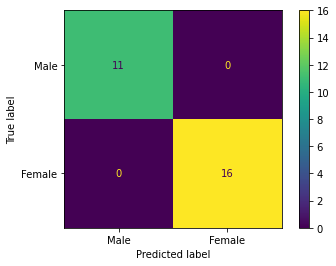

In [313]:
import numpy as np
con_matrix = confusion_matrix(y_test, y_prediction)

cm_display = ConfusionMatrixDisplay(confusion_matrix = con_matrix,
                                    display_labels = ['Female', 'Male'])
cm_display.plot()
plt.show()

# Support Vector Machines

In [314]:
# Support Vector Machines, Linear SVC Classifier

SVM = svm.SVC(kernel='linear')

SVM.fit(X_train, y_train)

y_prediction = SVM.predict(X_test)

acc_SVM = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of LinearSVC Classifier : ",acc_SVM , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of LinearSVC Classifier :  100.0 %
Confusion matrix:
[[11  0]
 [ 0 16]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        16

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



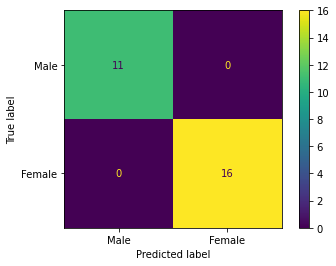

In [315]:
import numpy as np
con_matrix = confusion_matrix(y_test, y_prediction)

cm_display = ConfusionMatrixDisplay(confusion_matrix = con_matrix,
                                    display_labels = ['Female', 'Male'])
cm_display.plot()
plt.show()

# Multilayer Perceptron Classifier

In [316]:
# Multilayer Perceptron Classifier

Multilayer_Perceptron = MLPClassifier()

Multilayer_Perceptron.fit(X_train, y_train)

y_prediction = Multilayer_Perceptron.predict(X_test)

acc_MLPClassifier = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of Multilayer Perceptron Classifier : ",acc_MLPClassifier , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of Multilayer Perceptron Classifier :  59.26 %
Confusion matrix:
[[ 0 11]
 [ 0 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.59      1.00      0.74        16

    accuracy                           0.59        27
   macro avg       0.30      0.50      0.37        27
weighted avg       0.35      0.59      0.44        27



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


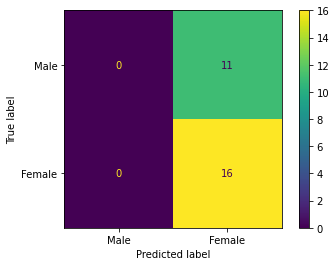

In [317]:
import numpy as np
con_matrix = confusion_matrix(y_test, y_prediction)

cm_display = ConfusionMatrixDisplay(confusion_matrix = con_matrix,
                                    display_labels = ['Female', 'Male'])
cm_display.plot()
plt.show()

In [318]:
#Applying hold-out cross-validation 80-20(train-test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state = 2)

In [319]:
X_train.shape

(64, 7)

In [320]:
X_test.shape

(16, 7)

# Random Forest Classifier

In [321]:
# Random Forest Classifier

random_forest = RandomForestClassifier(n_estimators=10)

random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

acc_randomforrest = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of Random Forrest Classifier : ",acc_randomforrest , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of Random Forrest Classifier :  100.0 %
Confusion matrix:
[[7 0]
 [0 9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



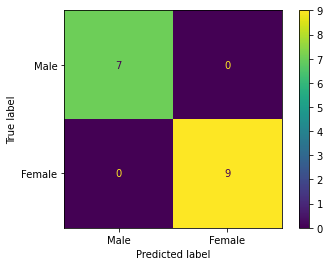

In [322]:
import numpy as np
con_matrix = confusion_matrix(y_test, y_prediction)

cm_display = ConfusionMatrixDisplay(confusion_matrix = con_matrix,
                                    display_labels = ['Female', 'Male'])
cm_display.plot()
plt.show()

# Support Vector Machines

In [323]:
# Support Vector Machines, Linear SVC Classifier

SVM = svm.SVC(kernel='linear')

SVM.fit(X_train, y_train)

y_prediction = SVM.predict(X_test)

acc_SVM = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of SVM Classifier : ",acc_SVM , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of SVM Classifier :  100.0 %
Confusion matrix:
[[7 0]
 [0 9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



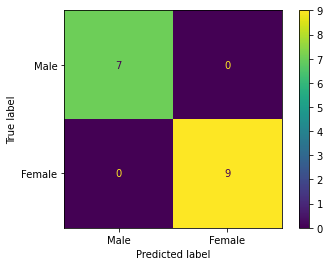

In [324]:
import numpy as np
con_matrix = confusion_matrix(y_test, y_prediction)

cm_display = ConfusionMatrixDisplay(confusion_matrix = con_matrix,
                                    display_labels = ['Female', 'Male'])
cm_display.plot()
plt.show()

# Multilayer Perceptron Classifier

In [325]:
# Multilayer Perceptron Classifier

Multilayer_Perceptron = MLPClassifier()

Multilayer_Perceptron.fit(X_train, y_train)

y_prediction = Multilayer_Perceptron.predict(X_test)

acc_MLPClassifier = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of Multilayer Perceptron Classifier : ",acc_MLPClassifier , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of Multilayer Perceptron Classifier :  62.5 %
Confusion matrix:
[[5 2]
 [4 5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.71      0.56      0.63         9

    accuracy                           0.62        16
   macro avg       0.63      0.63      0.63        16
weighted avg       0.64      0.62      0.63        16



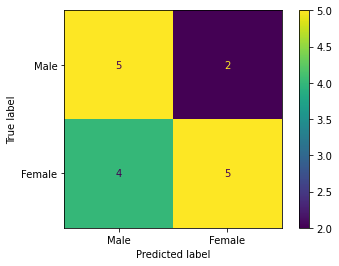

In [326]:
import numpy as np
con_matrix = confusion_matrix(y_test, y_prediction)

cm_display = ConfusionMatrixDisplay(confusion_matrix = con_matrix,
                                    display_labels = ['Female', 'Male'])
cm_display.plot()
plt.show()

# Features Importance

In [327]:
features = X_train.columns
FI = RandomForestClassifier(n_estimators=10)
FI.fit(X_train,y_train)
feature_importance = pd.DataFrame(data={
'Feature': features,
'Importance': FI.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance',ascending=False)

In [328]:
feature_importance

,Feature,Importance
4,shoe_size,0.451098
0,height,0.211554
1,weight,0.202225
2,beard,0.073961
6,eye_color,0.033769
3,hair_length,0.017981
5,scarf,0.009413


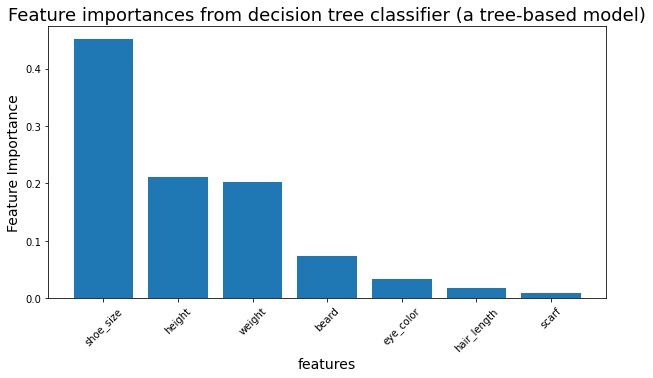

In [329]:
plt.figure(figsize=(10, 5))
plt.bar(x=feature_importance['Feature'], height=feature_importance['Importance']),
plt.title('Feature importances from decision tree classifier (a tree-based model)', size=18)
plt.ylabel("Feature Importance", size=14)

plt.xlabel("features", size=14)

plt.xticks(rotation=45)

plt.show()

# Excluding Powerful Attributes

In [330]:
X = genders_df.drop(['shoe_size', 'beard', 'gender'], axis = 1)
y = genders_df['gender']

In [331]:
X

,height,weight,hair_length,scarf,eye_color
0,71,176,3,0,0
1,68,165,0,0,0
2,62,132,2,1,1
3,65,138,1,0,3
4,70,197,2,0,3
...,...,...,...,...,...
75,65,99,3,1,4
76,61,98,3,0,2
77,67,119,3,0,0
78,70,190,2,0,3


# 80% - 20% split

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state = 2)

In [333]:
X_train.shape

(64, 5)

In [334]:
X_test.shape

(16, 5)

# Random Forrest Classifier

In [341]:
# Random Forest Classifier

random_forest = RandomForestClassifier(n_estimators=10)

random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

acc_randomforrest = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of Random Forrest Classifier : ",acc_randomforrest , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of Random Forrest Classifier :  87.5 %
Confusion matrix:
[[6 1]
 [1 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.89      0.89      0.89         9

    accuracy                           0.88        16
   macro avg       0.87      0.87      0.87        16
weighted avg       0.88      0.88      0.88        16



# Support Vector Machine

In [342]:
# Support Vector Machines, Linear SVC Classifier

SVM = svm.SVC(kernel='linear')

SVM.fit(X_train, y_train)

y_prediction = SVM.predict(X_test)

acc_SVM = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of SVM Classifier : ",acc_SVM , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of SVM Classifier :  100.0 %
Confusion matrix:
[[7 0]
 [0 9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



# Multilayer Perceptron Classifier

In [343]:
# Multilayer Perceptron Classifier

Multilayer_Perceptron = MLPClassifier()

Multilayer_Perceptron.fit(X_train, y_train)

y_prediction = Multilayer_Perceptron.predict(X_test)

acc_MLPClassifier = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of Multilayer Perceptron Classifier : ",acc_MLPClassifier , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of Multilayer Perceptron Classifier :  87.5 %
Confusion matrix:
[[7 0]
 [2 7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.78      0.88         9

    accuracy                           0.88        16
   macro avg       0.89      0.89      0.88        16
weighted avg       0.90      0.88      0.88        16



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Monte-Carlos cross-validation

In [362]:
DTC = DecisionTreeClassifier(random_state=10)

monte_carlos = ShuffleSplit(train_size=0.7, test_size=0.3, n_splits = 5)
f1_score = cross_val_score(DTC, features, y.values.reshape(-1,), scoring='f1', cv = monte_carlos)
mean_score = cross_val_score(DTC, features, y.values.reshape(-1,), scoring='f1', cv = monte_carlos).mean()
std_score = cross_val_score(DTC, features, y.values.reshape(-1,), scoring='f1', cv = monte_carlos).std()

print("Cross Validation F1 Scores: \n", f1_score)
print("\nAverage F1 Score: \n", mean_score)
print("\nStandard Deviation F1 Score: \n", std_score)

Cross Validation F1 Scores: 
 [0.89655172 0.92857143 0.83333333 0.96       0.91666667]

Average F1 Score: 
 0.9445370370370372

Standard Deviation F1 Score: 
 0.034228823400527214


# Leave P-Out cross-validation

In [368]:
DTC = DecisionTreeClassifier(random_state=10)

leavePout = LeavePOut(p=2)
f1_score = cross_val_score(DTC, features, y.values.reshape(-1,), scoring='f1', cv = leavePout)
mean_score = cross_val_score(DTC, features, y.values.reshape(-1,), scoring='f1', cv = leavePout).mean()
std_score = cross_val_score(DTC, features, y.values.reshape(-1,), scoring='f1', cv = leavePout).std()

print("Cross Validation F1 Scores: \n", f1_score)
print("\nAverage F1 Score: \n", mean_score)
print("\nStandard Deviation F1 Score: \n", std_score)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/anaconda3/lib/python3.9/site-packages/skl

Cross Validation F1 Scores: 
 [1.         1.         1.         ... 1.         0.66666667 0.66666667]

Average F1 Score: 
 0.7821729957805906

Standard Deviation F1 Score: 
 0.3973170265420241


# New Dataset with added values for test

In [371]:
df = pd.read_csv('/Users/macbookpro/Desktop/gender-prediction-added.csv')
df

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,71,176,yes,short,44,no,black,male
1,68,165,no,bald,41,no,black,male
2,62,132,no,medium,37,yes,blue,female
3,65,138,no,long,38,no,gray,female
4,70,197,yes,medium,43,no,gray,male
...,...,...,...,...,...,...,...,...
80,60,109,no,long,37,yes,brown,female
81,64,112,no,short,35,no,black,female
82,68,150,no,short,45,no,grey,male
83,63,124,no,medium,36,yes,brown,female


In [372]:
train_set = df.iloc[:80]
train_set

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,71,176,yes,short,44,no,black,male
1,68,165,no,bald,41,no,black,male
2,62,132,no,medium,37,yes,blue,female
3,65,138,no,long,38,no,gray,female
4,70,197,yes,medium,43,no,gray,male
...,...,...,...,...,...,...,...,...
75,65,99,no,short,39,yes,green,female
76,61,98,no,short,37,no,brown,female
77,67,119,yes,short,40,no,black,male
78,70,190,yes,medium,43,no,gray,male


In [373]:
test_set = df.iloc[80:]
test_set

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
80,60,109,no,long,37,yes,brown,female
81,64,112,no,short,35,no,black,female
82,68,150,no,short,45,no,grey,male
83,63,124,no,medium,36,yes,brown,female
84,65,130,no,medium,38,yes,brown,female


In [375]:
labels = preprocessing.LabelEncoder()
df['beard'] = labels.fit_transform(df['beard'])
df['hair_length'] = labels.fit_transform(df['hair_length'])
df['scarf'] = labels.fit_transform(df['scarf'])
df['eye_color'] = labels.fit_transform(df['eye_color'])
df['gender'] = labels.fit_transform(df['gender'])

In [376]:
train_set = df.iloc[:80]
test_set = df.iloc[80:]

In [377]:
X_train = train_set.drop(['gender'], axis = 1)
X_train

,height,weight,beard,hair_length,shoe_size,scarf,eye_color
0,71,176,1,3,44,0,0
1,68,165,0,0,41,0,0
2,62,132,0,2,37,1,1
3,65,138,0,1,38,0,3
4,70,197,1,2,43,0,3
...,...,...,...,...,...,...,...
75,65,99,0,3,39,1,4
76,61,98,0,3,37,0,2
77,67,119,1,3,40,0,0
78,70,190,1,2,43,0,3


In [378]:
y_train = train_set['gender']
y_train

0     1
1     1
2     0
3     0
4     1
     ..
75    0
76    0
77    1
78    1
79    0
Name: gender, Length: 80, dtype: int64

In [379]:
X_test = test_set.drop(['gender'], axis = 1)
X_test

,height,weight,beard,hair_length,shoe_size,scarf,eye_color
80,60,109,0,1,37,1,2
81,64,112,0,3,35,0,0
82,68,150,0,3,45,0,5
83,63,124,0,2,36,1,2
84,65,130,0,2,38,1,2


In [380]:
y_test = test_set['gender']
y_test

80    0
81    0
82    1
83    0
84    0
Name: gender, dtype: int64

# Gaussian Naive Bayes Classifier

In [389]:
# Gaussian Naive Bayes Classifier

Naive_Bayes = GaussianNB()

Naive_Bayes.fit(X_train, y_train)

y_prediction = Naive_Bayes.predict(X_test)

acc_GNBClassifier = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("The accuracy of Gaussian Naive Bayes Classifier : ",acc_GNBClassifier , "%")

pre_GNBClassifier = round(precision_score(y_test, y_prediction, average=None).mean() * 100, 2)
print("The precision of Gaussian Naive Bayes Classifier : ",pre_GNBClassifier , "%")

recall_GNBClassifier = round(recall_score(y_test, y_prediction, average=None).mean() * 100, 2)
print("The recall of Gaussian Naive Bayes Classifier : ",recall_GNBClassifier , "%")

con_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('Confusion matrix:')
print(con_matrix)

class_report = metrics.classification_report(y_test, y_prediction)
print('Classification Report:')
print(class_report)

The accuracy of Gaussian Naive Bayes Classifier :  100.0 %
The precision of Gaussian Naive Bayes Classifier :  100.0 %
The recall of Gaussian Naive Bayes Classifier :  100.0 %
Confusion matrix:
[[4 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



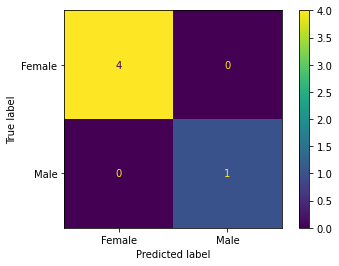

In [384]:
import numpy as np
con_matrix = confusion_matrix(y_test, y_prediction)

cm_display = ConfusionMatrixDisplay(confusion_matrix = con_matrix,
                                    display_labels = ['Female', 'Male'])
cm_display.plot()
plt.show()